In [18]:
#import the packages
import pandas as pd
import pandas_datareader.data as web
import datetime as dt

In [19]:
#import the graphing packages
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import mplfinance.original_flavor as mpf
from mplfinance.original_flavor import candlestick_ohlc

In [20]:
#Set time parameters:
start = dt.datetime(2021,1,1)
end = dt.datetime(2021,12,31)

In [24]:
#Create a dataframe from downloaded data 
df = web.DataReader('AAPL', 'yahoo', start, end)

In [25]:
#Export to a csv
df.to_csv('apple.csv')

In [26]:
#Reset the dataframe variable to read the exported data with dates as the index:
df = pd.read_csv('apple.csv', parse_dates=True, index_col=0)

In [27]:
#Print it out to see if it worked
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,133.61,126.76,133.52,129.41,1.43e+08,128.62
2021-01-05,131.74,128.43,128.89,131.01,9.77e+07,130.21
2021-01-06,131.05,126.38,127.72,126.60,1.55e+08,125.82
2021-01-07,131.63,127.86,128.36,130.92,1.10e+08,130.12
2021-01-08,132.63,130.23,132.43,132.05,1.05e+08,131.24
...,...,...,...,...,...,...
2021-11-23,161.80,159.06,161.12,161.41,9.60e+07,161.41
2021-11-24,162.14,159.64,160.75,161.94,6.95e+07,161.94
2021-11-26,160.45,156.36,159.57,156.81,7.70e+07,156.81


In [28]:
#Reduce decimal places for easier viewing
pd.set_option("display.precision", 2)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,133.61,126.76,133.52,129.41,1.43e+08,128.62
2021-01-05,131.74,128.43,128.89,131.01,9.77e+07,130.21
2021-01-06,131.05,126.38,127.72,126.60,1.55e+08,125.82
2021-01-07,131.63,127.86,128.36,130.92,1.10e+08,130.12
2021-01-08,132.63,130.23,132.43,132.05,1.05e+08,131.24
...,...,...,...,...,...,...
2021-11-23,161.80,159.06,161.12,161.41,9.60e+07,161.41
2021-11-24,162.14,159.64,160.75,161.94,6.95e+07,161.94
2021-11-26,160.45,156.36,159.57,156.81,7.70e+07,156.81


In [29]:
df['100ma']= df['Adj Close'].rolling(window=100, min_periods =0).mean()
df

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
2021-01-04,133.61,126.76,133.52,129.41,1.43e+08,128.62,128.62
2021-01-05,131.74,128.43,128.89,131.01,9.77e+07,130.21,129.41
2021-01-06,131.05,126.38,127.72,126.60,1.55e+08,125.82,128.22
2021-01-07,131.63,127.86,128.36,130.92,1.10e+08,130.12,128.69
2021-01-08,132.63,130.23,132.43,132.05,1.05e+08,131.24,129.20
...,...,...,...,...,...,...,...
2021-11-23,161.80,159.06,161.12,161.41,9.60e+07,161.41,147.73
2021-11-24,162.14,159.64,160.75,161.94,6.95e+07,161.94,147.94
2021-11-26,160.45,156.36,159.57,156.81,7.70e+07,156.81,148.06


In [30]:
%matplotlib inline

In [31]:
style.use('ggplot')

In [32]:
close= df['Adj Close']
sma= df['100ma']

Plotting matplotlib figures can create subplots, known as axes:


Text(0.5, 0, 'Year')

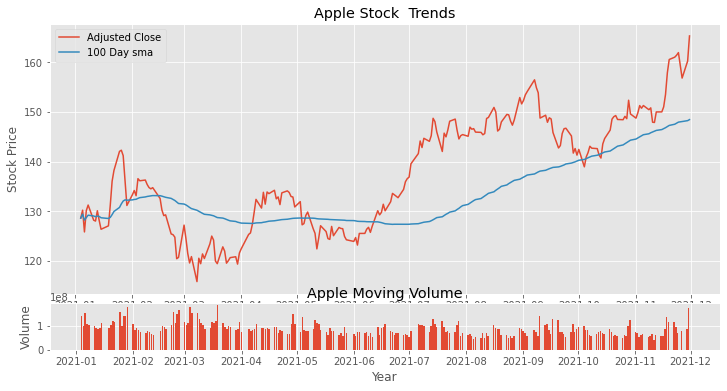

In [33]:
#The size for our chart:
plt.figure(figsize = (12,6))

ax1= plt.subplot2grid((6,1), (0,0), rowspan = 5, colspan =1)
ax2= plt.subplot2grid((6,1), (5,0), rowspan = 2, colspan =1) 
#In our case, we want to use the date, which is the index column, as well as the Adjust Close column.
ax1.plot(df.index, df['Adj Close'], label='Adjusted Close')
#And the 100 day moving average to compare the graphs:
ax1.plot(df.index, df['100ma'], label ='100 Day sma')
#We can also use a second set of data and a different graph type for the volume numbers:
ax2.bar(df.index, df['Volume'])
#ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

# add titles and labels
ax1.set_title('Apple Stock  Trends')
ax1.set_ylabel('Stock Price')
ax1.set_xlabel('Year')
ax1.legend()
ax2.set_title('Apple Moving Volume')
ax2.set_ylabel('Volume')
ax2.set_xlabel('Year')

## Resampling Data

In [14]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume']. resample('10D').sum()

df_ohlc.reset_index(inplace=True)
df_ohlc['Date'] =df_ohlc['Date'].map(mdates.date2num)

## Candlestick charts

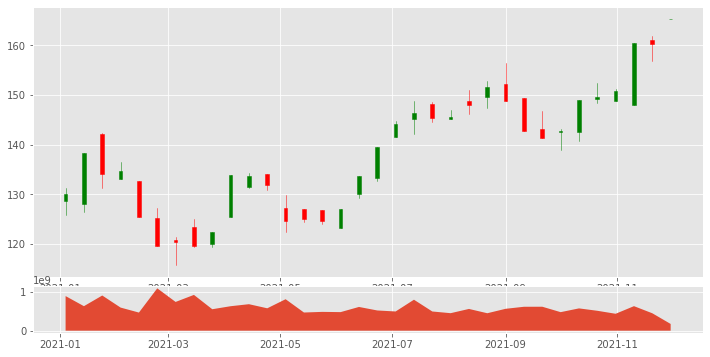

In [15]:
plt.figure(figsize = (12,6))

ax1 =plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 =plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num),df_volume.values,0)
plt.show()

In [16]:
df.index = pd.to_datetime(df.index)

# We need to exctract the OHLC prices into a list of lists:
dvalues = df[['Open', 'High', 'Low', 'Close']].values.tolist()

# Dates in our index column are in datetime format, we need to comvert them 
# to Matplotlib date format (see https://matplotlib.org/3.1.1/api/dates_api.html):
pdates = mdates.date2num(df.index)

# If dates in our index column are strings instead of datetime objects, we should use:
# pdates = mpl.dates.datestr2num(data.index)

# We prepare a list of lists where each single list is a [date, open, high, low, close] sequence:
ohlc = [ [pdates[i]] + dvalues[i] for i in range(len(pdates)) ]

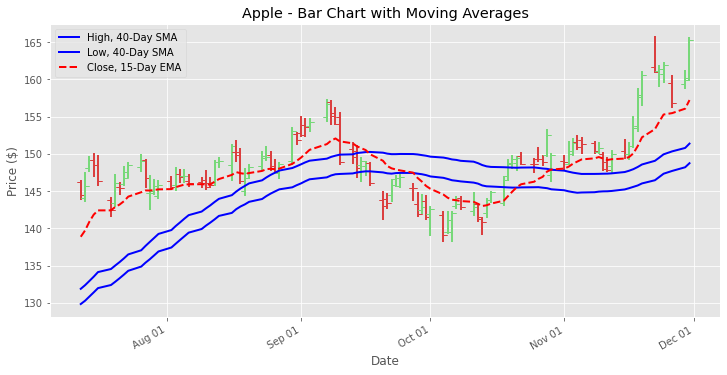

In [17]:
hsma40 = df['High'].rolling(40).mean()
lsma40 = df['Low'].rolling(40).mean()
ema15 = df['Close'].ewm(span=15).mean()

fig, ax = plt.subplots(figsize = (12,6))

mpf.plot_day_summary_ohlc(ax, ohlc[-100:], ticksize = 4, colorup='#77d879', colordown='#db3f3f')
ax.plot(hsma40[-100:], color = 'blue', linewidth = 2, label='High, 40-Day SMA')
ax.plot(lsma40[-100:], color = 'blue', linewidth = 2, label='Low, 40-Day SMA')
ax.plot(ema15[-100:], color = 'red', linestyle='--', linewidth = 2, label='Close, 15-Day EMA')

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Apple - Bar Chart with Moving Averages')
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()